In [35]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: darkblue;
color:orange; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;">

<b style = "color: lightblue;
">Python Exploratory Data Analysis for </b>Student Performance</h1>
'''

display(HTML(html_code))

In [36]:
!pip install catboost

In [37]:
!pip install lightgbm

In [38]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: darkblue;
color:white; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;">

<span style = "color: lightblue;
">Importing Libraries for </span> 
<span style = "color: orange;">Student Data</span>
</h1>
'''

display(HTML(html_code))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')

In [42]:
# Feature Engineering
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

In [43]:
# Data Modelling
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [44]:
# Model Evaluation
from sklearn.metrics import mean_squared_error
rs = 999

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (10).zip")

In [46]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: darkblue;
color:white; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;">

<span style = "color: lightblue;
">Reading</span> 
<span style = "color: orange;">Student Data</span>
</h1>
'''

display(HTML(html_code))

In [47]:
df.shape

(6607, 20)

In [48]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [49]:
df.duplicated().sum()

0

In [50]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [51]:
from IPython.display import HTML, display

html_code = '''
<div style = "background-color:lightblue ;
border-radius: 10px;
padding: 16px;
text-align: left;">

<span style = "color:black;
">The available data shows missing values, accounting for <b>299 rows</b>, around <b>3.466021%</b> of the entire dataset.
We will begin by removing these rows. </span> 
</div>
'''

display(HTML(html_code))

In [52]:
df_na = df.dropna()
print(df_na.shape)
df_na.isnull().sum()

(6378, 20)


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [53]:
df_na.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [54]:
df_cleaned = df_na[df_na['Exam_Score'] <= 100]
df_cleaned.shape
df_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [55]:
from IPython.display import HTML, display

html_code = '''
<div style = "background-color:lightblue ;
border-radius: 10px;
padding: 16px;
text-align: left;">

<span style = "color:black;
">Next, we will confirm the data type of each column and separate them into numerical and categorical variables based on their data types.</span>

<br>
<span style = "color:orange;">
We will convert variables that are actually categorical but were classified as numerical due to their integer data type into 
categorical variables. </span> 
</div>
'''

display(HTML(html_code))

In [56]:
df_cleaned.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [57]:
num_col = ['Hours_Studied', 'Attendance', 'Previous_Scores']
cat_col = ['Parental_Involvement', 'Access_to_Resources', 'Sleep_Hours', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
target = 'Exam_Score'

In [58]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: darkblue;
color:white; font-size: 30px;
border-radius: 20px;
padding: 16px;
text-align: center;">

<span style = "color: lightblue;
">Data Visualization for </span> 
<span style = "color: orange;">Student Data</span>
</h1>
'''

display(HTML(html_code))

In [59]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid olive
text-align: left;">

<span style = "color:black;
">Distribution of target variable</span> 
<span style = "color: orange;"><b>(exam_score)</b></span>
</h1>
'''

display(HTML(html_code))

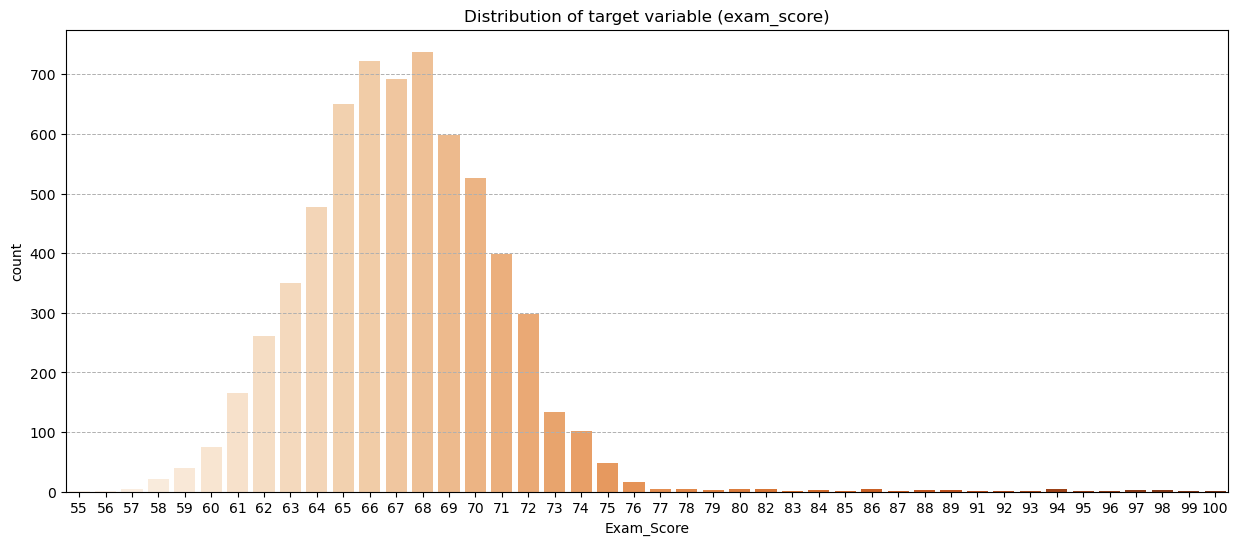

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x=df_cleaned[target], palette = 'Oranges')

plt.title("Distribution of target variable (exam_score)")
plt.grid(True, which = 'Major', axis = 'y', linestyle='--', linewidth=0.7)

In [61]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">The bottom 21.89% of scores are under 64, while the top 24.78% scores are over 70, </span> 
<span style = "color: orange;">50% of the scores are concentrated between 65 and 69. </span>
</h1>
'''

display(HTML(html_code))

In [63]:
a = len(df_cleaned[df_cleaned['Exam_Score'] <= 64]) / len(df_cleaned['Exam_Score']) * 100
b = len(df_cleaned[df_cleaned['Exam_Score'] >= 70]) / len(df_cleaned['Exam_Score']) * 100
c = len(df_cleaned[(df_cleaned['Exam_Score'] >= 65) & (df_cleaned['Exam_Score'] <= 69)]) / len(df_cleaned['Exam_Score']) * 100

print("The bottom", f'{a:0.2f}', "% are under 64")
print("The top", f'{b:0.2f}', "% are over 70")
print("The middle", f'{c:0.2f}', "% are in between 65 and 69")

The Bottom 21.89 % are under 64
The Bottom 24.78 % are over 70
The Bottom 53.33 % are in between 65 and 69


In [66]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">We will first implement code that prevents warnings</span> 
<span style = "color: orange;"> about infinite warnings during data visualization. </span>
</h1>
'''

display(HTML(html_code))

In [68]:
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace = True)
df_cleaned.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [69]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">Distribution of </span> 
<span style = "color: orange;">Numeric Variables. </span>
</h1>
'''

display(HTML(html_code))

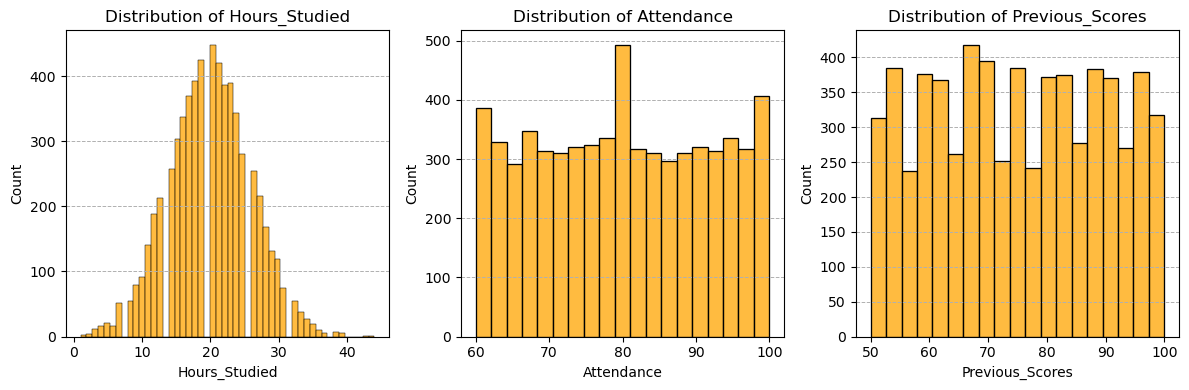

In [76]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))

axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.histplot(x= df_cleaned[col], ax=axes[idx], color = 'orange')
    axes[idx].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    axes[idx].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [80]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">- The breaks or gaps in the 'Hours_Studied' variable may be due to respondents answering approximately. </span> 
<br></br>
<span style = "color: orange;">- The variables 'Attendance' and 'Previous_Scores', which exhibit a uniform distribution, have minimal impact on the 'Exam_Score' variable. </span>
</h1>
'''

display(HTML(html_code))

In [85]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">Relationship between the numerical variables and the target variable </span> 
<span style = "color: orange;">by Scatterplot</span>
</h1>
'''

display(HTML(html_code))

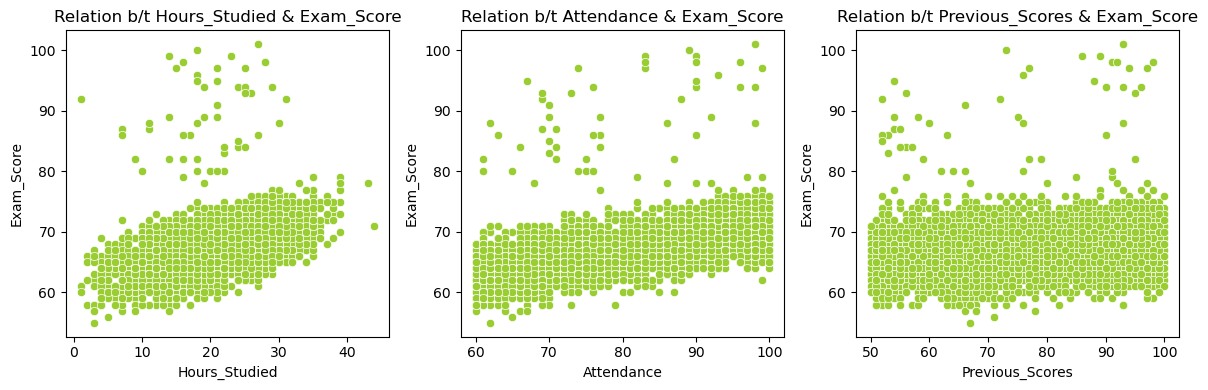

In [88]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))

axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.scatterplot(x= df_na[col], y = df_na[target], ax=axes[idx], color = 'yellowgreen')
    axes[idx].set_title(f"Relation b/t {col} & {target}")
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

<Axes: >

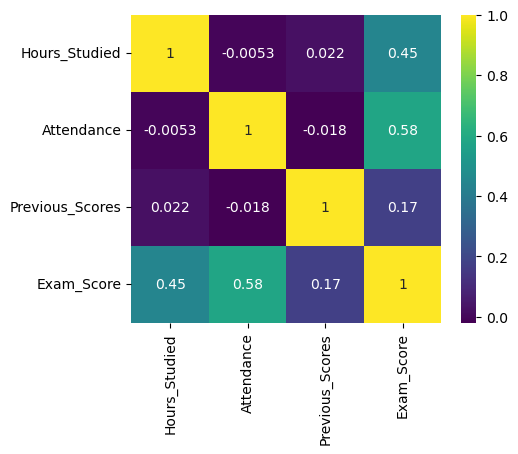

In [89]:
corr_col = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
df_corr = df_cleaned[corr_col]

corr = df_corr.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='viridis')

In [91]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">- The variables 'Hours_Studied' and 'Attendance' show a positive correlation with 'Exam_Hours' </span> 
<br></br>
<span style = "color: orange;">However, 'Prevoius_Scores' appears to have little to no relation with 'Exam_Score'. </span>
<br></br>
<span style = "color:black;
">- Accordingly, there are many values that deviate from the overall trend. </span>
<br></br>
<span style = "color: orange;">These outliers represent smart students, instances of cheating or the effects of other variables. </span>
<br></br>
<span style = "color: black;">- The most explainable variable is 'Extracurricular_Activities'. </span>
<br></br>
<span style = "color: orange;">Which can be confirmed below. </span>
</h1>
'''

display(HTML(html_code))

In [93]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">Distribution of </span> 
<span style = "color: orange;">Categorical Variables</span>
</h1>
'''

display(HTML(html_code))

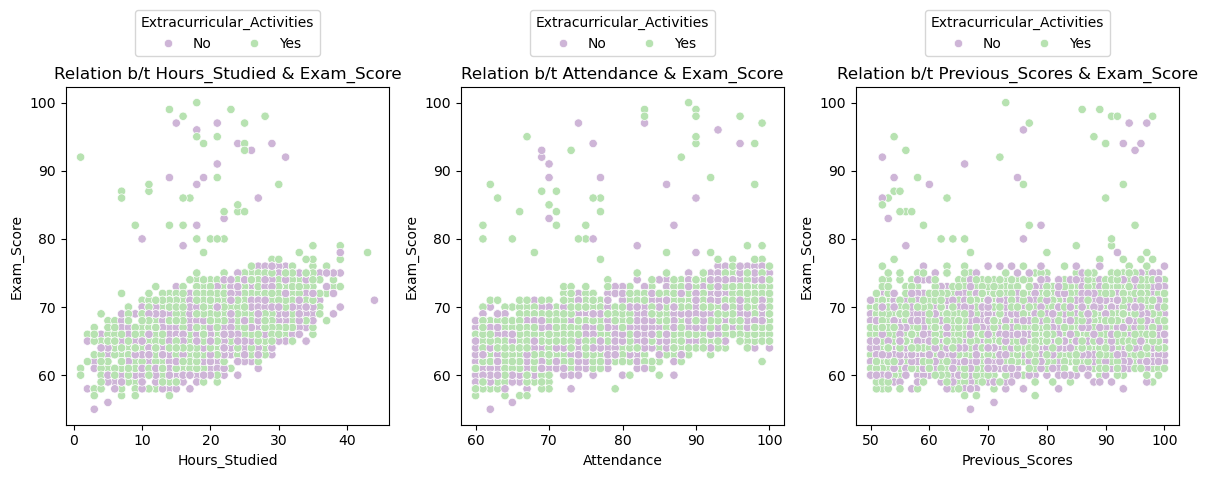

In [92]:
fig, axes = plt.subplots(1, 3, figsize = (12, 5))

axes = axes.ravel()

for idx, col in enumerate(num_col):
    sns.scatterplot(x= df_na[col], y = df_na[target], ax=axes[idx], palette= 'PRGn', hue=df_cleaned['Extracurricular_Activities'])
    axes[idx].set_title(f"Relation b/t {col} & {target}")
    axes[idx].legend(loc="upper center", bbox_to_anchor=(0.5, 1.25), ncol=2, title="Extracurricular_Activities")
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

In [101]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">Variables that influence the median test score(2Q, 50%):<br>
'Parental Involvement', 'Access_to_Resources','Internet_Access', 'Tutoring_Session', 'Learning_Disabilities', 'Parental_Education'.
According to the box plot, the higher the parental involvement, access to learning materials and the internet, frequency of physical activity
</span><br><br>

<span style = "color: orange;">Parental_Education_Level:<br></span>Interestingly, there is little difference in the median test scores (Q2) between students whose parents graduated from high school and college. 
<br><br>

<span style = "color:black;
">Variables that do not influence the median test score(2Q, 50%):<br>
'Sleep_Hours', 'Extracurricular_Activities', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence'
</span><br><br>

<span style = "color:black;
">Variables that affect Q1 and Q3 test scores but not the median test score (2Q, 50%):<br>
'Family_Income', 'Teacher_Quality', 'Peer_Influence'</span><br><br>

<span style = "color:orange;
">Parental_Income:<br>
<span style = "color:black;">For families with low or average income, there was no significant difference in the median test score (Q2), but a notable difference</span><br><br>

<span style = "color:black;
">The task is to identify the factors influencing the numerous outliers. <br>
What were the circumstances that helped some individuals achieve higher success despite the challenges they faced. </span><br>

</h1>
'''

display(HTML(html_code))

In [104]:
from IPython.display import HTML, display

html_code = '''
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:orange;
">The distribution of the target variable with respect to other variables. </span> 
</h1>

<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">You may glean meaningful insights by examining how the proportion of labels in each column changes in the score range of 64 or below, <br><br> 
reperesenting the bottom 21.89%, and in the score range of 70 or above, representing the top 24.78%</span> 

</h1>

'''

display(HTML(html_code))

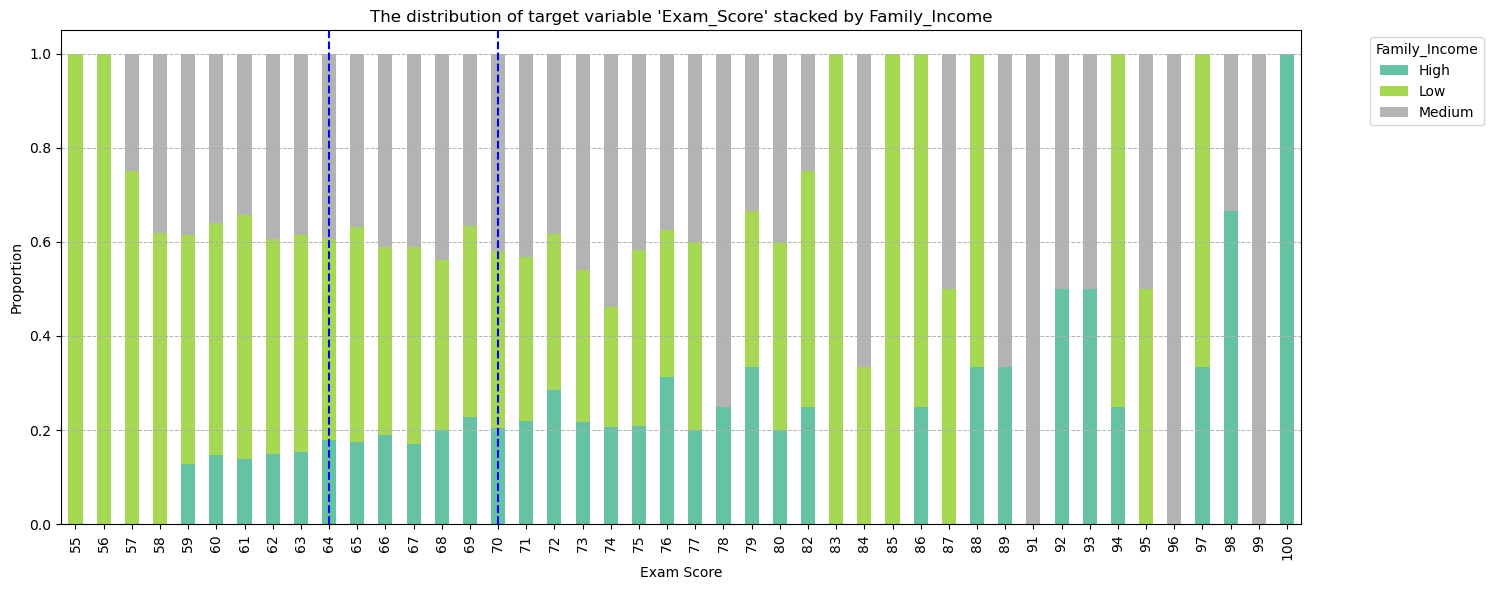

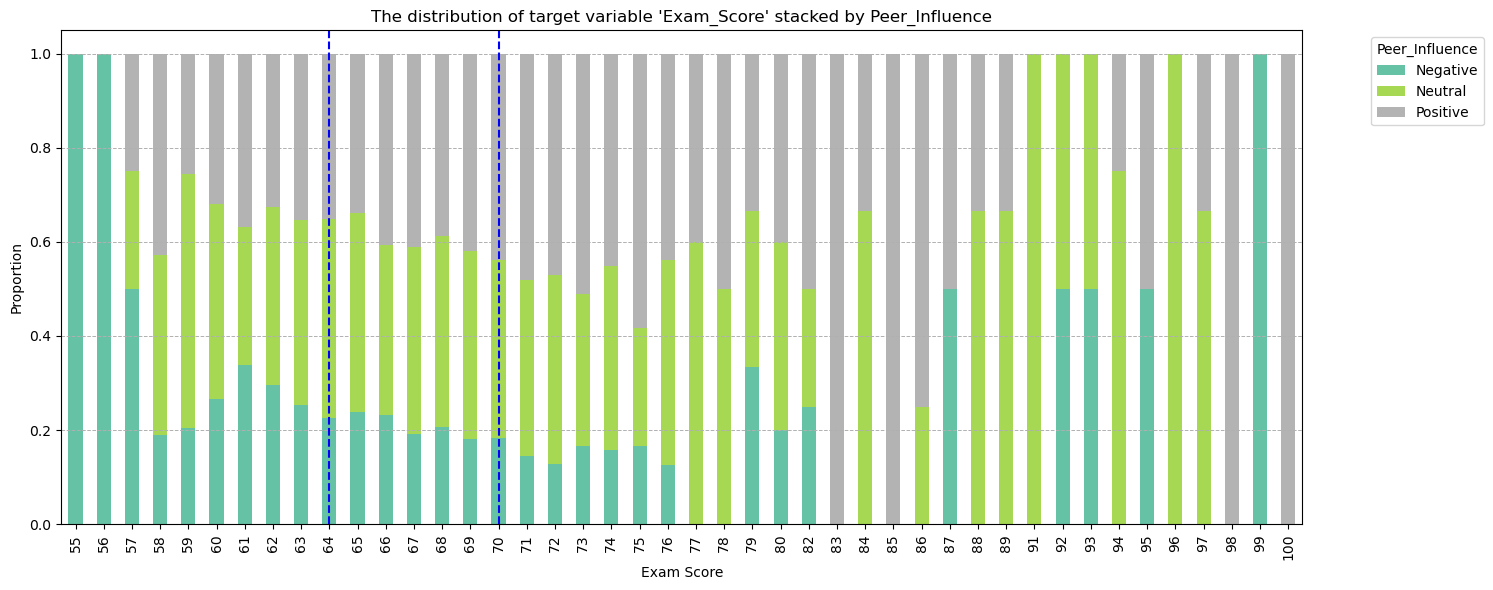

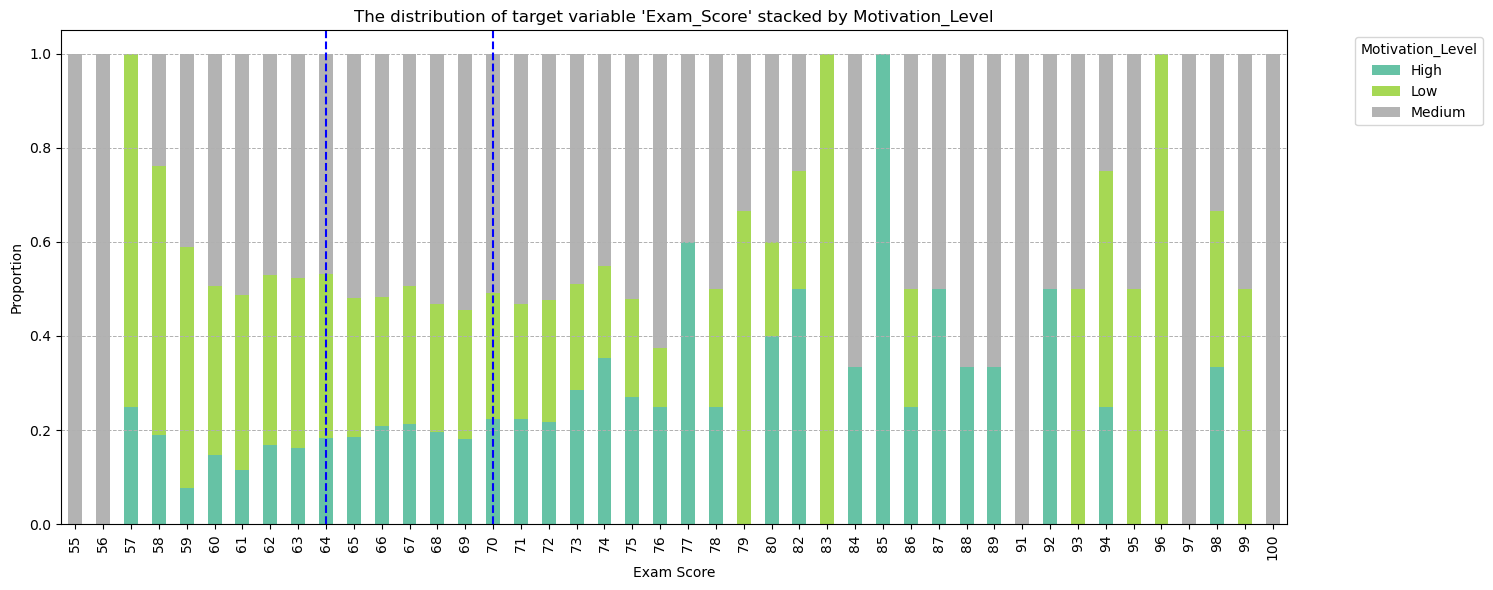

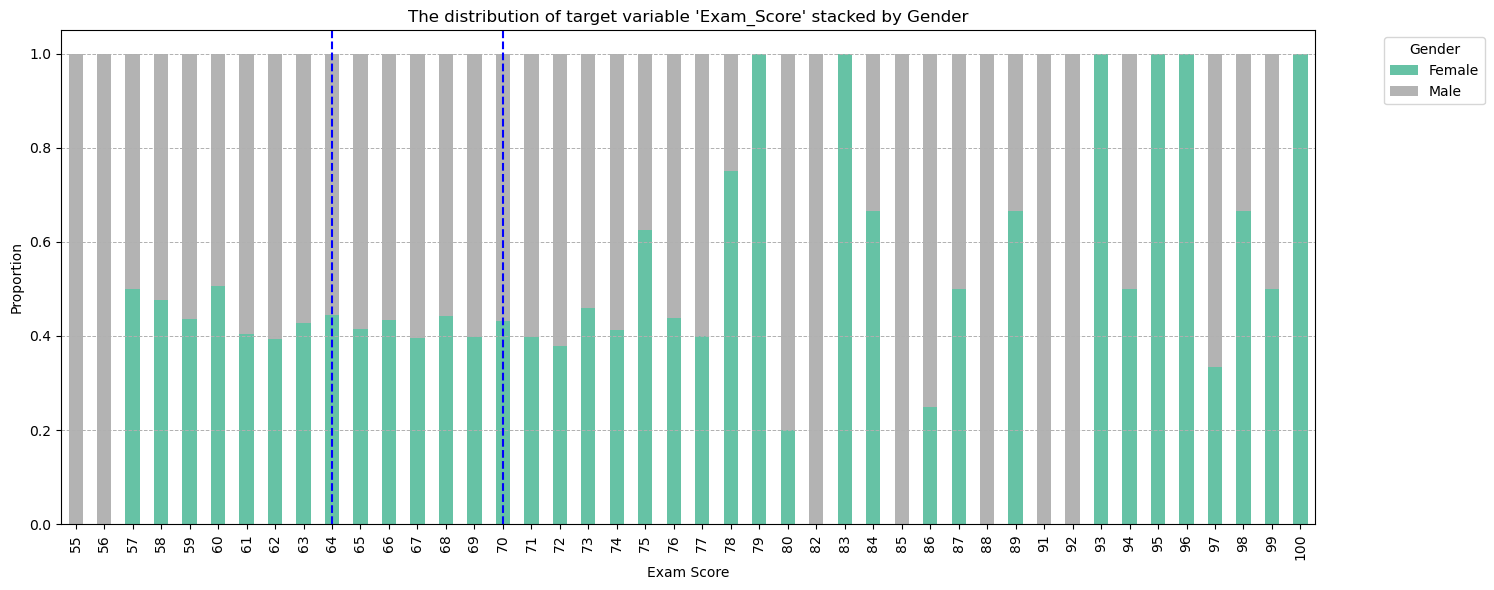

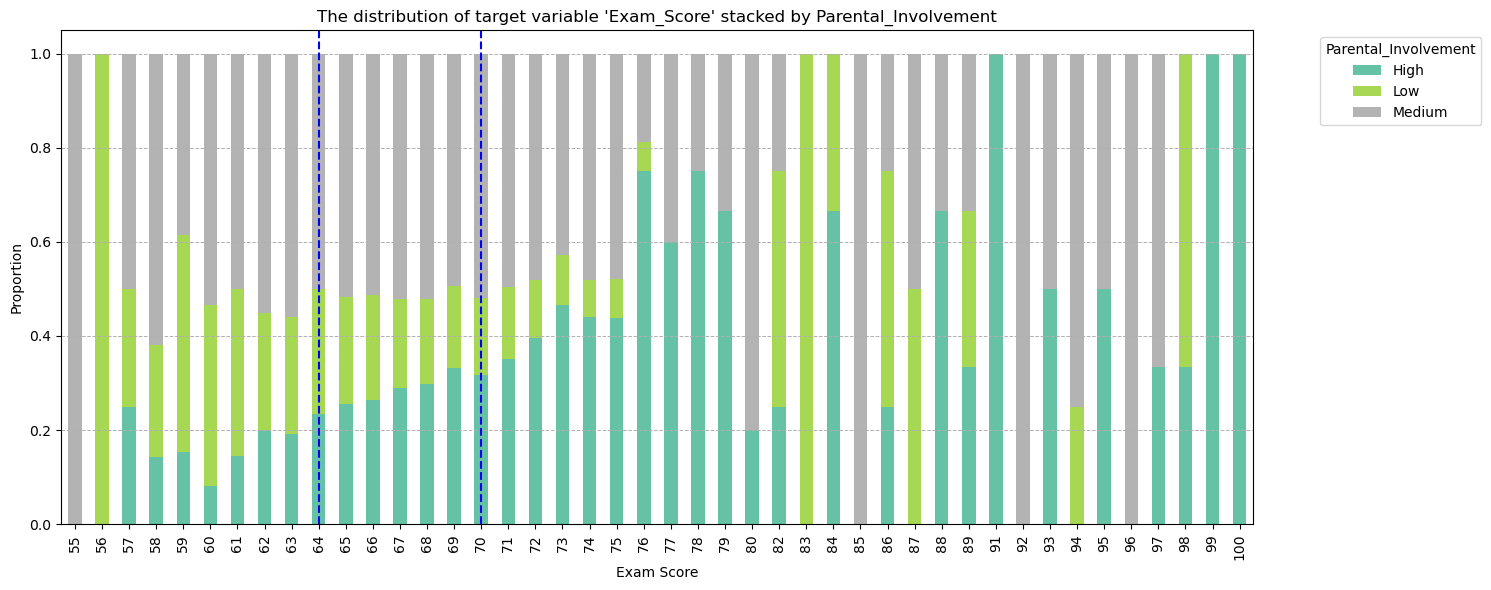

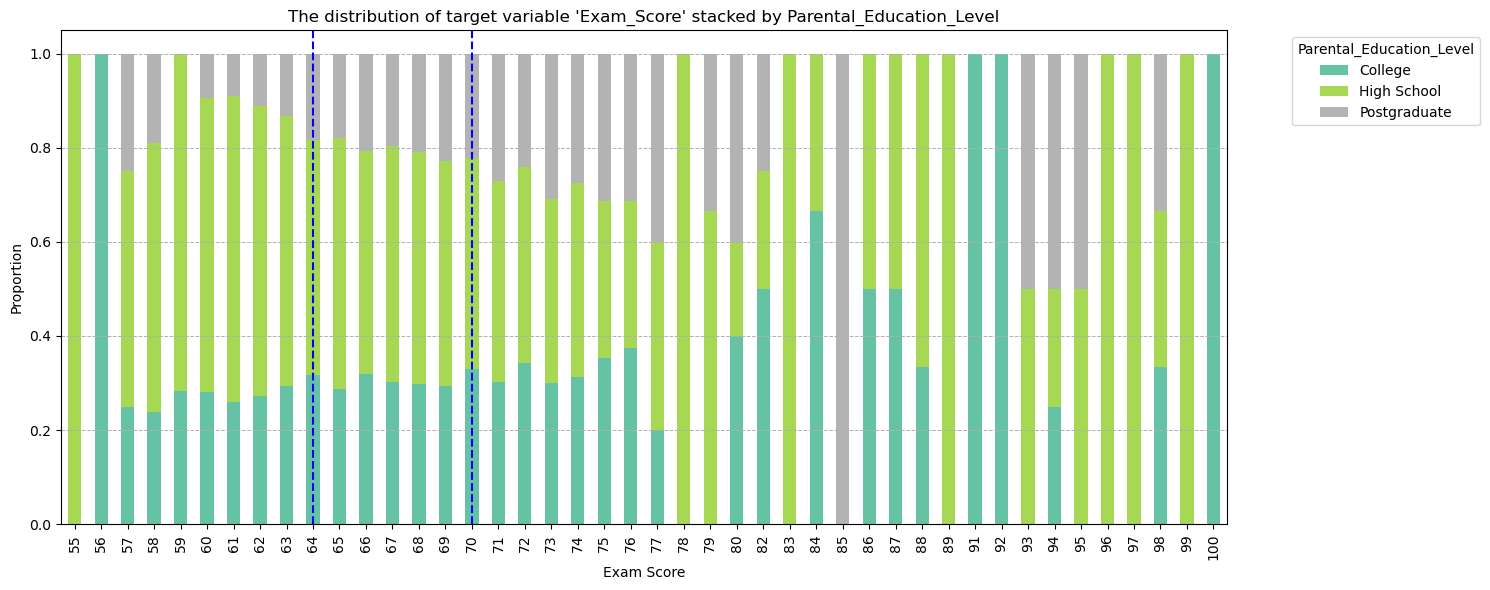

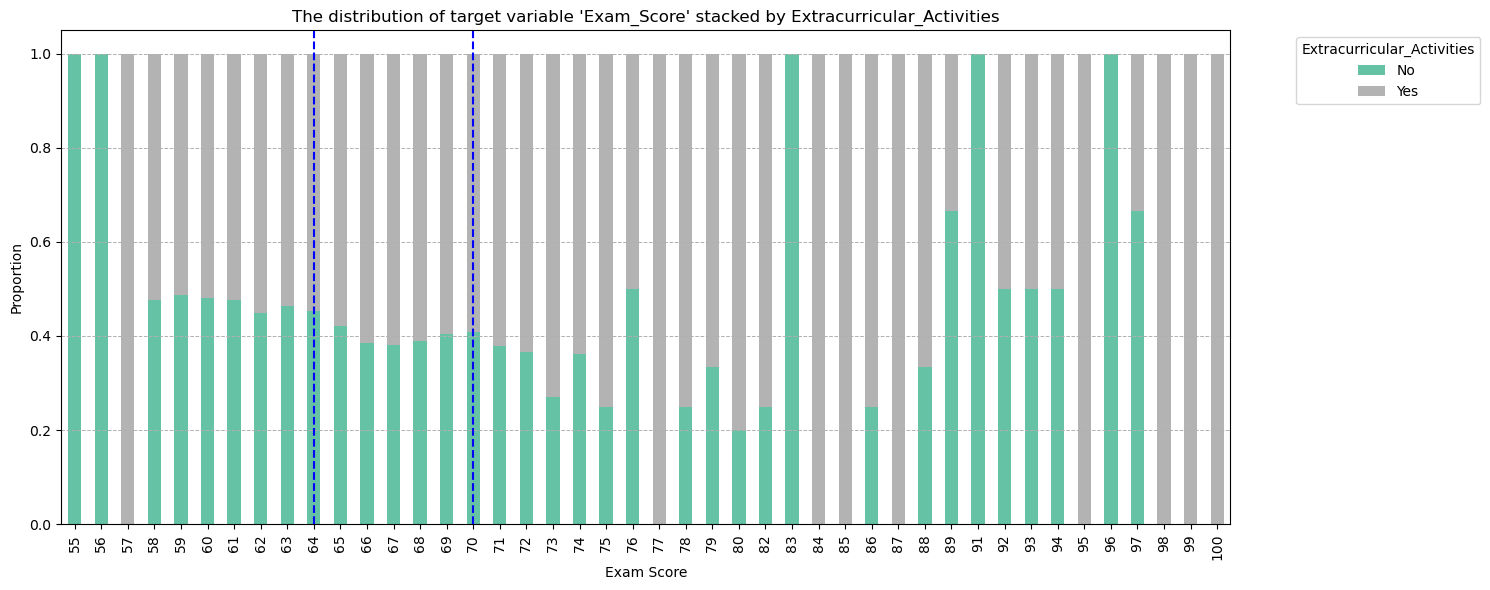

In [106]:
for col in ['Family_Income', 'Peer_Influence', 'Motivation_Level', 'Gender', 'Parental_Involvement', 'Parental_Education_Level', 'Extracurricular_Activities']:
    crosstab_data = pd.crosstab(df_cleaned[target], df_cleaned[col], normalize='index')
    
    ax = crosstab_data.plot(kind='bar', stacked=True, figsize=(15, 6), colormap='Set2')
    plt.title(f"The distribution of target variable 'Exam_Score' stacked by {col}")
    plt.xlabel('Exam Score')
    plt.ylabel('Proportion')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)
    ax.axvline(x=9, color='blue', linestyle='--', linewidth=1.5)
    ax.axvline(x=15, color='blue', linestyle='--', linewidth=1.5)
    plt.tight_layout()
    plt.show()

In [110]:
from IPython.display import HTML, display

html_code = '''
<h2 style="color:black;font-weight: bold;">Conclusion</h2>
<h1 style = "background-color: lightblue; font-size: 14px;
border-radius: 20px;
padding: 12px;
border: 4px solid darkgreen
text-align: left;">

<span style = "color:black;
">-When certain factors affect Q1 and Q3 but not Q2, it can be understood that the individual has overcome challenges through personal effort.<br><br>
-However, assuming the same level of individual effort, it seems that environmental factors have influenced Q3. In other words, students who lack favourable environments in terms of parentl education level, parental income, teacher quality, 
and peer influence may be able to reach the same Q2 as other groups through their effort. <br>
However, it appears much more difficult for them to achieve the same Q3 as those from more advantageous backgrounds.</span> 
<br><br>
<span style = "color: orange;"> If government policies and corporate social contributions were focussed on addressing these aspects, 
it seems we can create a dynamic environment with greater social mobility and open opportunities for all. </span>

<br><br>

<span style = "color:black;
">-If Extracurricular activities can outweigh the influence of other variables on academic performance, policies that foster an environment for 
such activities in schools can have a significant impact. By allowing students to pursue areas of interest outside the standard curriculum, 
they can experience autonomy, a sense of accomplishment, confidence and self-efficiency. These positive mechanisms, regardless of exam scores, 
will enrich their overall lives and enable them to contribute socially. <br><br>
-However, assuming the same level of individual effort, it seems that environmental factors have influenced Q3. In other words, students who lack favourable environments in terms of parentl education level, parental income, teacher quality, 
and peer influence may be able to reach the same Q2 as other groups through their effort. <br>
However, it appears much more difficult for them to achieve the same Q3 as those from more advantageous backgrounds.</span> 

<br><br>

<span style = "color: orange;"> We must also recognize that all this analysis ultimately applies to students in the top 20% of academic performance. 
I hope that schools can evolve into environments that support not only the top 20% but all students in their growth. 
I believe that beyond academic success, we all want to live a happy life and contribute to the society in our own unique ways. 
I sincerely hope that my children do not have to endure the harsh competition I faced as a teenager. I wish for our teens to learn love and acceptance, 
rather than competition and distrust. I am confident that this direction of development will greatly benefit the mental health, happiness and 
healthy mindset of students in the top 20% of academic performance.</span>
</h1>

'''

display(HTML(html_code))